In [40]:
import yfinance as yf
import pandas as pd
import numpy as np

In [41]:
df = pd.read_excel('tabela periodica base_enzo.xlsx',index_col='DS_TITULO',sheet_name= 'BRL').iloc[:5]
df.columns = [ '2023Q3', '2023Q4', '2024Q1', '2024Q2', '',
       'Desde o Inicio', 'YTD']
df[''] = pd.NA
df[['2023Q3', '2023Q4', '2024Q1', '2024Q2','Desde o Inicio', 'YTD']] = df[['2023Q3', '2023Q4', '2024Q1', '2024Q2','Desde o Inicio', 'YTD']].astype('float')
periodos = df.columns
print(periodos)
df

Index(['2023Q3', '2023Q4', '2024Q1', '2024Q2', '', 'Desde o Inicio', 'YTD'], dtype='object')


,2023Q3,2023Q4,2024Q1,2024Q2,,Desde o Inicio,YTD
DS_TITULO,,,,,,,
AUSTIN FIM IE,0.032381,0.029437,0.041641,0.065798,<NA>,0.179866,0.110179
FRANKFURT FIM IE,0.016540,0.052151,0.080673,0.073217,<NA>,0.240465,0.159797
JOHANNESBURG FIM IE,0.015576,0.050353,0.092598,0.080176,<NA>,0.258933,0.180198
SYDNEY FIM IE,0.013204,0.044761,0.058245,0.074294,<NA>,0.203437,0.136867
SIRIUS FIC,0.024097,0.043936,0.068176,0.073372,<NA>,0.225767,0.146551


C:\Users\eduardomoreira\AppData\Local\Temp\ipykernel_32136\264048996.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  wrapped_data = tabela_periodica.applymap(lambda x: wrap_text(str(x), 10))  # Ajustar o valor de largura conforme necessário


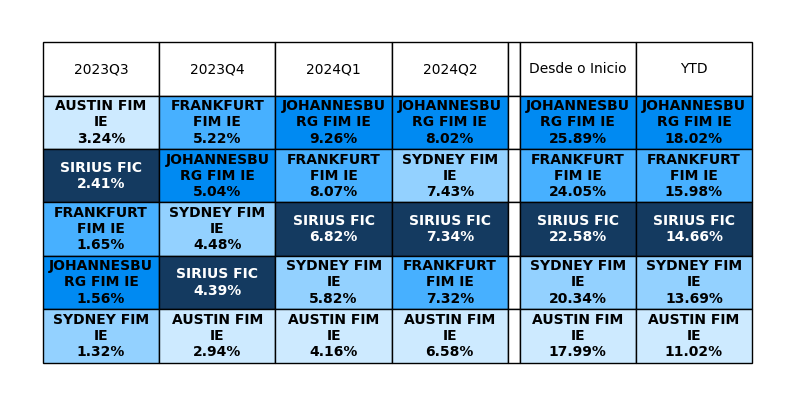

In [42]:


colunas = []
for i in range(len(df.columns)):
    temp = df.iloc[:,i].sort_values(ascending=False)
    temp = pd.DataFrame(temp)
    temp =  temp.apply(lambda x: x.index + "                   " + x.apply(lambda y: f"{y:.2%}"))
    temp = temp.reset_index()
    temp = temp.iloc[:,1]
    colunas.append(temp)
    
tabela_periodica = pd.concat(colunas,ignore_index=True,axis=1)
tabela_periodica.columns = periodos
tabela_periodica[''] =np.nan
tabela_periodica['']= tabela_periodica[''].astype(object).where(pd.notnull(tabela_periodica['']),'')



import matplotlib.pyplot as plt
import pandas as pd
import textwrap


#######################################################################################################
###################################!!!!PONTO IMPORTANTE!!!!############################################
########  AQUI É PRECISO ESCOLHER AS CORES E ESTILODE FONTE PARA CADA ATIVO############################
#######################################################################################################

# Definir as cores para cada classe
## Tons de LARANJA
# color_map = {'AUSTIN FIM IE': '#FFF5E5',
#               'FRANKFURT FIM IE': '#FFDA9F', 
#               'JOHANNESBURG': '#FFDA9F', 
#               'SYDNEY': '#FFE7C1', 
#               'SIRIUS' : '#C47900',

# }
## Tons de AZUL
color_map = {'AUSTIN FIM IE': '#CDEAFF',
              'FRANKFURT FIM IE': '#47B0FF', 
              'JOHANNESBURG': '#008AF2', 
              'SYDNEY': '#93D1FF', 
              'SIRIUS' : '#143A60',

}
# Definir as cores da fonte
font_color_map = {
    'AUSTIN FIM IE': 'black',
    'FRANKFURT FIM IE': 'black',
    'JOHANNESBURG': 'black',
    'SYDNEY': 'black',
    'SIRIUS': 'white'
}
# Definir o estilo da fonte
font_style_map = {
    'AUSTIN FIM IE': 'bold',
    'FRANKFURT FIM IE': 'bold',
    'JOHANNESBURG': 'bold',
    'SYDNEY': 'bold',
    'SIRIUS': 'bold'
}
#######################################################################################################
#######################################################################################################


# Função para quebrar texto
def wrap_text(text, width):
    return '\n'.join(textwrap.wrap(text, width))

# Criar a tabela com matplotlib
fig, ax = plt.subplots(figsize=(10, 5)) # Ajustar o tamanho geral da tabela
ax.axis('tight')
ax.axis('off')

# Ajustar o texto nas células
wrapped_data = tabela_periodica.applymap(lambda x: wrap_text(str(x), 10))  # Ajustar o valor de largura conforme necessário

# Criar a tabela
table = ax.table(cellText=wrapped_data.values, colLabels=tabela_periodica.columns, cellLoc='center', loc='center')

# Ajustar o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(10)

# Ajustar manualmente a largura das colunas
col_widths = [0.15, 0.15, 0.15,0.15, 0.015,0.15,0.15]  # Defina a largura desejada para cada coluna

for key in table.get_celld().keys():
    row, col = key
    cell = table.get_celld()[(row, col)]
    if col < len(col_widths):  # Ignorar a linha do cabeçalho
        cell.set_width(col_widths[col])

# Colorir as células conforme o color_map e ajustar a fonte conforme font_color_map e font_style_map
for i, row in tabela_periodica.iterrows():
    for j, col in enumerate(tabela_periodica.columns):
        value = tabela_periodica.at[i, col]
        bg_color = 'white'  # Default background color
        font_color = 'black'  # Default font color
        font_weight = 'regular'  # Default font weight
        for key in color_map.keys():
            if key in str(value):  # Verificar substring
                bg_color = color_map[key]
                font_color = font_color_map[key]
                font_weight = font_style_map[key]
                break
        cell = table[(i+1, j)]
        cell.set_facecolor(bg_color)
        cell.set_text_props(color=font_color, weight=font_weight)

# Ajustar altura das linhas
table.scale(1, 3.2)  # ajuste a altura das linhas (1.5 é um exemplo, ajuste conforme necessário)

# Ajustar layout
# plt.title('Tabela Rentabilidades ')
plt.show()
